<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Homework_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction

Sets are a collection of objects

Empty sets are denoted by {} or by ∅

The union of two sets A and B is A $\cup$ B and its all of the elements of A and B

The intersection of two sets A and B is A $\cap$ B and its all of the elements in both A and B

A colon is sued to indicate such that

$\in$ is used to denote if something is a member of a set

\ is a set minus so A \ B is everything in A thats also not in B


In [7]:
#Within python sets exists through the set data type
#A set is made up of objects
A = {"apple", "banana", "cherry", False, 10, 12}
B = {"cherry",True,10, False, 92, "Michael Jordan"}

diff = A.difference(B)
print("These are in A but not in B:", diff)
sect = A.intersection(B)
print("These are in both A and B:", sect)

These are in A but not in B: {12, 'apple', 'banana'}
These are in both A and B: {False, 10, 'cherry'}


## Sets of numbers

Natural Numbers $\mathbb{R}$ = {1,2,3...}

Whole = {0,1,2,3...}

Integers={...-3,-2,-1,0,1,2,3...}

Rationals={1/2,1/3,1/10,1/23,-1/4,0...} a/b where a and b are integers and b $\neq$ 0

Irrationals={e,pi,..} essntially real numbers not expressible as a fraction

Real = All numbers including rational and irrational

Complex Numbers = a + bi: a,b $\in$ $\mathbb{R}$ i = $\sqrt{-1}$

## Vectors
The set of $\mathbb{R}^n$ is an n-tuple or point in $\mathbb{R}^n$. They can be written in a row or in a column. Coverting a row to a column or the other way is a transpose like $v^T$. The zero vector is the vector in $\mathbb{R}^n$ containing all zeros. The **norm** of a vector is a measure of its length.


In [18]:
#Import numpy
import numpy as np
from numpy import dot
from numpy.linalg import norm


vector_row = np.array([[1,2,3]])
vector_column = np.array([[1],[6],[2]])
print(vector_row.shape)
print(vector_column.shape)

#Norm is calculated with the norm fucnton
print("Length:",norm(vector_row,1))
print("Dot product:",dot(vector_row,vector_column))

print("Cross product:",np.cross(vector_column.T,vector_row))

(1, 3)
(3, 1)
Length: 3.0
Dot product: [[19]]
Cross product: [[14 -1 -4]]


# 1.2 Elements of Linear Algebra
## Linear combinations
Linear combination is a new vector made from a subset by multiplying each vector and adding the results. A linear subspace is formed from a linear combination. Span is the set of all linear subspaces. A list of all the vectors that span a linear subspace are referred to as a spanning set of U.
Linear independence is used to avoid redudancy. If none of the vectors can be written as a linear combination of the others, then they are linearly independent.

## Orthogonality

The use of orthonormal bases can simplify mathematical representations. A list of vectors are orthonormal if each has a norm of 1 and their dot products are 0.

## Gram-Schmidt algorithm
Gram-Schmidt algorithm  is used to obtain an orthonormal basis. A basis is used to span a subspace.

## Eigenvalues an Eigenvectors
If there exists a nonzero vector x $\neq$ 0 and Ax = λx, then λ is the eigen value and x is the eigen vector. Eigenvectors are important for simpler linear transformation because they are the axes in which linear transformations are simply stretching/compressing/flipping. The Power Method can be used to find the largest eigenvalue.

## The Spectral Theorem for Symmetric Matrices

This states that for n x n symmetric matrix A, it has the following properties:


*   A has n real eigenvalues
*   if λ is an eigenvalye of A with multiplicity k, then the eigenspace for λ is k-dimensional
*  The eigenspaces are all orthogonal
*  A is orthogonally diagonalizable




In [40]:
#Below we can use an implementation of the Power Method from the book
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

x = np.array([1, 1])
b = np.array([1, 1])
# x = 1 1

# a = 0 2
#     2 3
a = np.array([[0, 2],
              [7, 3]])

for i in range(12):
    x = np.dot(a, x)
    lambda_1, x = normalize(x)

print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)


Eigenvalue: 5.530599038645319
Eigenvector: [0.36162448 1.        ]


<ipython-input-64-163f647f2d83>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


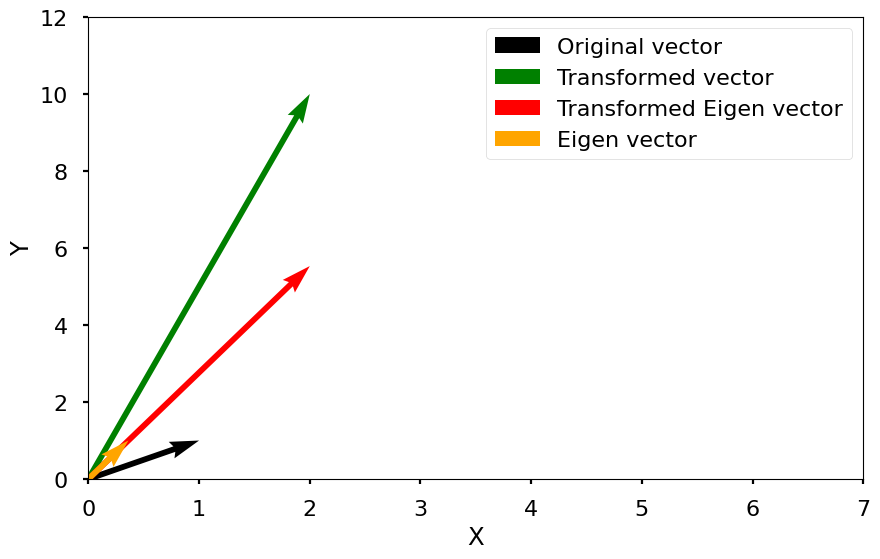

In [64]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b,c,d, xlim, ylim):
    '''
    function to plot two vectors,
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.quiver(0,0,c[0],c[1],\
        color='r',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed Eigen vector')
    plt.quiver(0,0,d[0],d[1],\
        color='orange',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Eigen vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


plot_vect(b,np.dot(a,b),np.dot(a,x),x,(0,7),(0,12))

#The graph below shows how the transformation affects a regular vector vs the eigen vector


# 1.3 Linear Regression
Linear regression is an estimation function that when given a set of indepdent data points and dependent data points can desribe the data as best as possible.
The main reason its used is because of its simplicity. The goal of least squares regression is to find the parameters of the estimation function that minimize the total squared error.


[1.56595666 0.99886792]


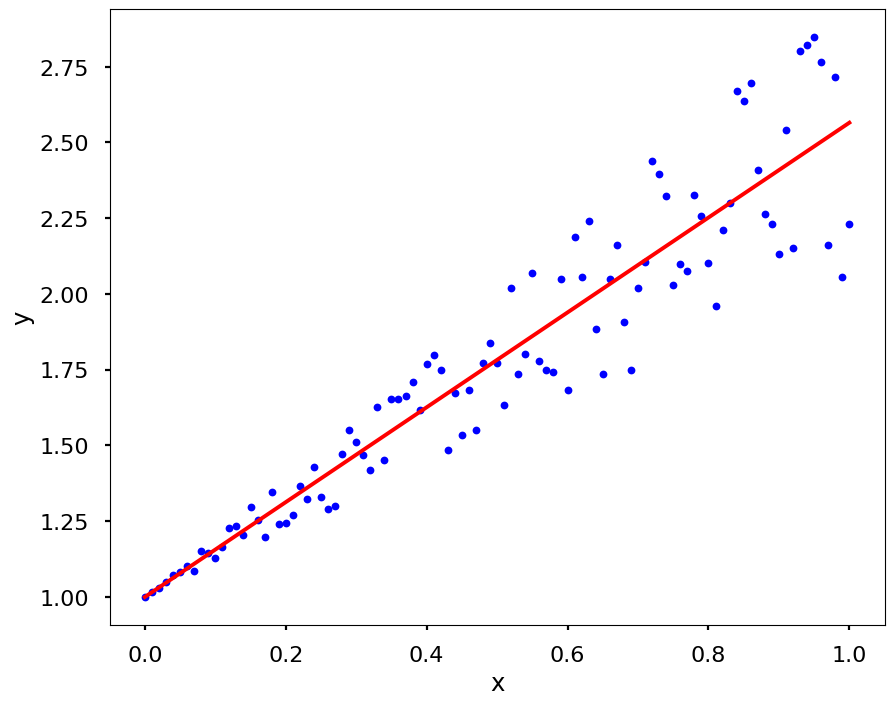

In [68]:
from scipy import optimize
#Scipy can be used to create the linear graph

#Create random data points
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 1.4 Principal Component Analysis
Principal component analysis or PCA is used for dimensionality reduction by projecting each data point onto only the first few principal components, while preserving as much of the data's variation.

## Singular Value Decomposition
This is a factorization of matrix that transforms one matrix into three matrices.

## Low-Rank Matrix Approximations
This invoves approximating a complex high dimensional matrix into one of a lower rank.
## Covariance Matrix
This is a tool that measures the covariance of the elements with each other.